In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
X = np.random.rand(1000, 1) * 10   
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 1000) 

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K_values = [1, 3, 5, 7, 9, 15, 25]
mse_values = []
r2_values = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"K = {k}: MSE = {mse:.4f}, R2 = {r2:.4f}")

best_k = K_values[np.argmin(mse_values)]
print(f"\nНайкраще значення K = {best_k} (найменше MSE)")


K = 1: MSE = 0.0206, R2 = 0.9546
K = 3: MSE = 0.0129, R2 = 0.9716
K = 5: MSE = 0.0111, R2 = 0.9755
K = 7: MSE = 0.0104, R2 = 0.9769
K = 9: MSE = 0.0098, R2 = 0.9783
K = 15: MSE = 0.0095, R2 = 0.9790
K = 25: MSE = 0.0098, R2 = 0.9783

Найкраще значення K = 15 (найменше MSE)


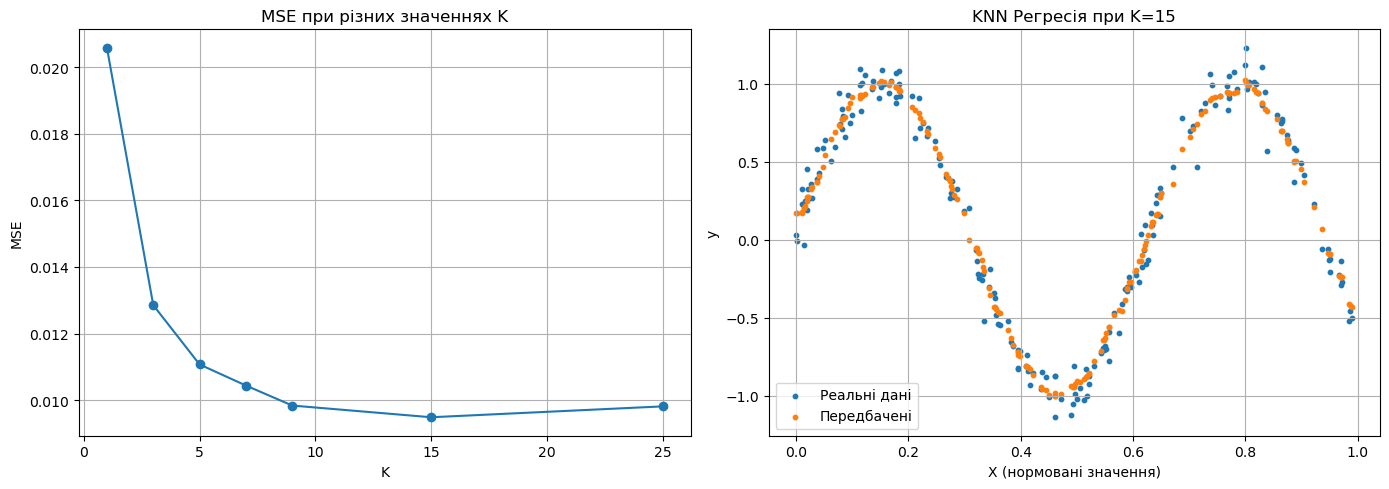

In [3]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_values, mse_values, marker='o')
plt.title("MSE при різних значеннях K")
plt.xlabel("K")
plt.ylabel("MSE")
plt.grid(True)

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_best_pred = best_knn.predict(X_test)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label="Реальні дані", s=10)
plt.scatter(X_test, y_best_pred, label="Передбачені", s=10)
plt.title(f"KNN Регресія при K={best_k}")
plt.xlabel("X (нормовані значення)")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()